In [1]:
import os
import pandas as pd
import numpy  as np
from skimage import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data=r"C:\Users\user\Downloads\archive"
no_tumor=r"C:\Users\user\Downloads\archive\no"
yes_tumor=r"C:\Users\user\Downloads\archive\yes"

In [3]:
dirlist=[no_tumor,yes_tumor]
classes=['No','Yes']
filepaths=[]
labels=[]

In [4]:
for i,j in zip(dirlist,classes):
    filelists=os.listdir(i)
    for f in filelists:
        filepaths.append(os.path.join(i,f))
        labels.append(j)

In [5]:
files=pd.Series(filepaths,name="filepaths")
labels_s=pd.Series(labels,name="labels")
df=pd.concat([files,labels_s],axis=1)

In [6]:
df.shape

(253, 2)

In [7]:

df = df.sample(frac = 1)

In [8]:
df.shape

(253, 2)

In [9]:
df=df.reset_index()

In [10]:
df

,index,filepaths,labels
0,107,C:\Users\user\Downloads\archive\yes\Y107.jpg,Yes
1,33,C:\Users\user\Downloads\archive\no\40 no.jpg,No
2,210,C:\Users\user\Downloads\archive\yes\Y50.JPG,Yes
3,99,C:\Users\user\Downloads\archive\yes\Y10.jpg,Yes
4,183,C:\Users\user\Downloads\archive\yes\Y257.jpg,Yes
...,...,...,...
248,35,C:\Users\user\Downloads\archive\no\42 no.jpg,No
249,232,C:\Users\user\Downloads\archive\yes\Y75.JPG,Yes
250,100,C:\Users\user\Downloads\archive\yes\Y100.JPG,Yes
251,252,C:\Users\user\Downloads\archive\yes\Y99.JPG,Yes


In [11]:
df.drop('index',inplace=True,axis=1)

In [12]:
df

,filepaths,labels
0,C:\Users\user\Downloads\archive\yes\Y107.jpg,Yes
1,C:\Users\user\Downloads\archive\no\40 no.jpg,No
2,C:\Users\user\Downloads\archive\yes\Y50.JPG,Yes
3,C:\Users\user\Downloads\archive\yes\Y10.jpg,Yes
4,C:\Users\user\Downloads\archive\yes\Y257.jpg,Yes
...,...,...
248,C:\Users\user\Downloads\archive\no\42 no.jpg,No
249,C:\Users\user\Downloads\archive\yes\Y75.JPG,Yes
250,C:\Users\user\Downloads\archive\yes\Y100.JPG,Yes
251,C:\Users\user\Downloads\archive\yes\Y99.JPG,Yes


In [13]:
def f(s):
    if s=='No':
        return 0
    else:
        return 1
df['labels']=df.labels.apply(f)
df.head()

,filepaths,labels
0,C:\Users\user\Downloads\archive\yes\Y107.jpg,1
1,C:\Users\user\Downloads\archive\no\40 no.jpg,0
2,C:\Users\user\Downloads\archive\yes\Y50.JPG,1
3,C:\Users\user\Downloads\archive\yes\Y10.jpg,1
4,C:\Users\user\Downloads\archive\yes\Y257.jpg,1


In [14]:
from PIL import Image

In [15]:
widths=[]
heights=[]
for idx,rows in df.iterrows():
    path=rows['filepaths']
    img=Image.open(path)
    width,height=img.size
    widths.append(width)
    heights.append(height)
avg_width=int(sum(widths)/len(widths))
avg_height=int(sum(heights)/len(heights))
    
print(avg_width)
print(avg_height)
    

354
386


In [16]:
from keras.preprocessing.image import load_img
def load_resize_color_image(path):
    # load image and resize to 300x300
    image = load_img(path,target_size=(300,300))
    return image

In [17]:
image_list=[]
cancer_list=[]
from keras.preprocessing.image import img_to_array
for idx,rows in df.iterrows():
    path=rows['filepaths']
    cancer=rows['labels']
    image= load_resize_color_image(path)
    image_array = img_to_array(image)   
    image_list.append(image_array)
    cancer_list.append(cancer)

In [18]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(image_list, cancer_list)

In [19]:
x=np.array(image_list)
y=np.array(cancer_list)

In [20]:
x.shape

(253, 300, 300, 3)

In [21]:
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import  Flatten
from keras.layers import Input
from keras.layers import Dropout

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
epochs=10
batch_size=25
input_size=(300, 300, 3)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [26]:
model=Sequential()
model.add(Input(shape=(300,300,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss="binary_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

In [28]:
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
9/9 [==============================] - 13s 1s/step - loss: 2.7540 - accuracy: 0.5792 - val_loss: 0.3305 - val_accuracy: 0.8627
Epoch 2/10
9/9 [==============================] - 12s 1s/step - loss: 0.4085 - accuracy: 0.7970 - val_loss: 0.3415 - val_accuracy: 0.8627
Epoch 3/10
9/9 [==============================] - 12s 1s/step - loss: 0.2792 - accuracy: 0.8812 - val_loss: 0.5792 - val_accuracy: 0.8431
Epoch 4/10
9/9 [==============================] - 12s 1s/step - loss: 0.1243 - accuracy: 0.9653 - val_loss: 0.4236 - val_accuracy: 0.8824
Epoch 5/10
9/9 [==============================] - 12s 1s/step - loss: 0.0517 - accuracy: 0.9802 - val_loss: 0.4858 - val_accuracy: 0.9020
Epoch 6/10
9/9 [==============================] - 12s 1s/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.4789 - val_accuracy: 0.9020
Epoch 7/10
9/9 [==============================] - 12s 1s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.5472 - val_accuracy: 0.9020
Epoch 8/10
9/9 [==================

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 170528)            0         
                                                                 
 dense (Dense)               (None, 512)               8

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6645445227622986
Test accuracy: 0.9019607901573181


In [31]:
hist_dict = hist.history

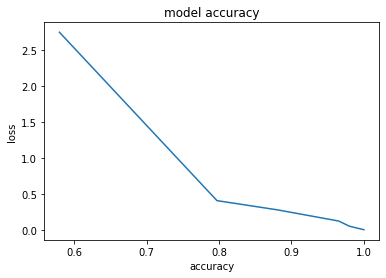

In [32]:
sns.lineplot(x=hist_dict['accuracy'],y=hist_dict['loss'])
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel("loss")
plt.show()

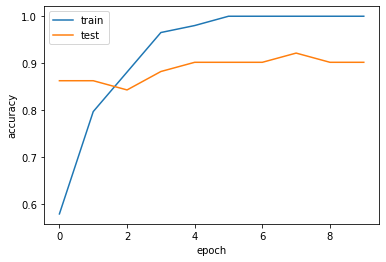

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist_dict['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')

In [34]:
print(hist.history['val_loss'])

[0.3305188715457916, 0.34145253896713257, 0.5791851282119751, 0.42363667488098145, 0.48576775193214417, 0.47886890172958374, 0.5472028255462646, 0.5381240248680115, 0.6184800267219543, 0.6645445227622986]


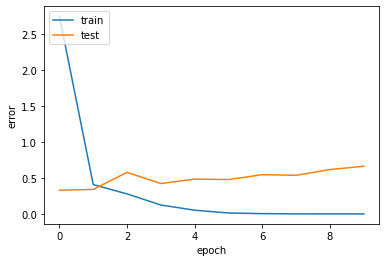

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(['train','test'],loc='upper left')

In [36]:
model.save('brain_tumor.h5')

In [37]:
y_pred= model.predict(X_test)

In [38]:
y_pred=np.around(y_pred,decimals=0)
y_pred.astype(int)

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [39]:
confusion_matrix(y_pred,y_test)

array([[17,  2],
       [ 3, 29]], dtype=int64)

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        19
         1.0       0.94      0.91      0.92        32

    accuracy                           0.90        51
   macro avg       0.89      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51

